In [ ]:
import zipfile
import os

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/coco2017_subset.zip'

# Directory where you want to extract the contents
extract_path = '/content/extracted_files'

# Create the directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to {extract_path}")

Files extracted to /content/extracted_files


In [ ]:
import json
import os

In [ ]:
# Path to COCO annotation file and output folder for YOLO labels
coco_ann_file = r"/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"
output_dir = "/content/extracted_files/coco2017_subset/train2017"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Load COCO annotations
with open(coco_ann_file, 'r') as f:
    coco_data = json.load(f)

In [ ]:
# Create mapping: COCO category id -> new id (0-based contiguous indices)
# For example, if valid categories are 1, 2, 3, 5, 6, ... then you might have:
coco_categories = sorted([cat['id'] for cat in coco_data['categories']])
id_mapping = {orig_id: new_id for new_id, orig_id in enumerate(coco_categories)}

In [ ]:
# Build a mapping from image_id to image info
img_info = {img['id']: img for img in coco_data['images']}

In [ ]:
# Process annotations per image
annotations_by_image = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    img = img_info[img_id]
    img_width, img_height = img['width'], img['height']

    x, y, w, h = ann['bbox']
    # Convert COCO bbox [x, y, w, h] to YOLO format [x_center, y_center, width, height] normalized
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    norm_w = w / img_width
    norm_h = h / img_height

    # Remap the category id
    orig_cat = ann['category_id']
    if orig_cat not in id_mapping:
        continue  # skip if the category is not in the mapping
    new_cat = id_mapping[orig_cat]

    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(f"{new_cat} {x_center:.6f} {y_center:.6f} {norm_w:.6f} {norm_h:.6f}")

In [ ]:
# Write YOLO label files for each image
for img_id, ann_list in annotations_by_image.items():
    file_name = img_info[img_id]['file_name']
    base_name = os.path.splitext(file_name)[0]
    # Save the label file in the same directory as your images, or wherever you prefer
    out_file = os.path.join(output_dir, base_name + '.txt')
    with open(out_file, 'w') as f:
        for line in ann_list:
            f.write(line + '\n')

In [ ]:
coco_ann_file = '/content/extracted_files/coco2017_subset/annotation_subset/instances_val2017_subset.json'
output_dir = '/content/extracted_files/coco2017_subset/val2017'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Load COCO annotations
with open(coco_ann_file, 'r') as f:
    coco_data = json.load(f)

In [ ]:
# Create mapping: COCO category id -> new id (0-based contiguous indices)
# For example, if valid categories are 1, 2, 3, 5, 6, ... then you might have:
coco_categories = sorted([cat['id'] for cat in coco_data['categories']])
id_mapping = {orig_id: new_id for new_id, orig_id in enumerate(coco_categories)}

In [ ]:
# Build a mapping from image_id to image info
img_info = {img['id']: img for img in coco_data['images']}

In [ ]:
# Process annotations per image
annotations_by_image = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    img = img_info[img_id]
    img_width, img_height = img['width'], img['height']

    x, y, w, h = ann['bbox']
    # Convert COCO bbox [x, y, w, h] to YOLO format [x_center, y_center, width, height] normalized
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    norm_w = w / img_width
    norm_h = h / img_height

    # Remap the category id
    orig_cat = ann['category_id']
    if orig_cat not in id_mapping:
        continue  # skip if the category is not in the mapping
    new_cat = id_mapping[orig_cat]

    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(f"{new_cat} {x_center:.6f} {y_center:.6f} {norm_w:.6f} {norm_h:.6f}")

In [ ]:
# Write YOLO label files for each image
for img_id, ann_list in annotations_by_image.items():
    file_name = img_info[img_id]['file_name']
    base_name = os.path.splitext(file_name)[0]
    # Save the label file in the same directory as your images, or wherever you prefer
    out_file = os.path.join(output_dir, base_name + '.txt')
    with open(out_file, 'w') as f:
        for line in ann_list:
            f.write(line + '\n')

In [ ]:
import os
import yaml

# Define target directory for COCO dataset
output_dir = '/content/extracted_files/coco2017_subset/'
# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# COCO 2017 dataset configuration
data = {
    'path': output_dir,  # Base path to the dataset
    'train': '/content/extracted_files/coco2017_subset/train2017',  # Relative path to training images
    'val': '/content/extracted_files/coco2017_subset/val2017',  # Relative path to validation images
    'test': '/content/extracted_files/coco2017_subset/test2017',  # Relative path to test images (optional)

    'nc': 80,  # Number of classes in COCO dataset

    # Official COCO 2017 class names in order
    'names': [
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
        'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
        'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
        'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
        'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
        'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
        'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
        'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
        'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]
}

# Path to save data.yaml
yaml_path = os.path.join(output_dir, 'data.yaml')

# Write YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f"✅ data.yaml saved at: {yaml_path}")

✅ data.yaml saved at: /content/extracted_files/coco2017_subset/data.yaml


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 825.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)


True
12.4


In [ ]:
model=YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 31.5MB/s]


In [ ]:
data_yaml='/content/extracted_files/coco2017_subset/data.yaml'
epochs=5
img_size=640
batch_size=2

In [ ]:
print("Starting Yolo Training")
# Change device to 'cpu' if cuda is unavailable
res = model.train(data=data_yaml, epochs=epochs, imgsz=img_size, batch=batch_size, device=0)
print("Training completed")

Starting Yolo Training
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/extracted_files/coco2017_subset/data.yaml, epochs=5, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning /content/extracted_files/coco2017_subset/train2017.cache... 29315 images, 256 backgrounds, 0 corrupt: 100%|██████████| 29571/29571 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/extracted_files/coco2017_subset/val2017.cache... 1237 images, 13 backgrounds, 0 corrupt: 100%|██████████| 1250/1250 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.645G      1.218      1.688       1.29         17        640: 100%|██████████| 14786/14786 [30:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:24<00:00, 12.70it/s]


                   all       1250       9236      0.594      0.473      0.501      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.703G      1.249      1.737      1.308          3        640: 100%|██████████| 14786/14786 [29:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:20<00:00, 15.24it/s]


                   all       1250       9236      0.582      0.457      0.486      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.691G       1.24      1.716      1.305          9        640: 100%|██████████| 14786/14786 [29:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:20<00:00, 15.38it/s]


                   all       1250       9236      0.626      0.435      0.488      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.688G      1.226      1.673      1.298          4        640: 100%|██████████| 14786/14786 [28:51<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:20<00:00, 14.97it/s]


                   all       1250       9236      0.607      0.452      0.487      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.734G      1.207      1.617      1.284          8        640: 100%|██████████| 14786/14786 [29:13<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:21<00:00, 14.34it/s]


                   all       1250       9236      0.617      0.459        0.5      0.347

5 epochs completed in 2.475 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:16<00:00, 18.83it/s]


                   all       1250       9236      0.618      0.459        0.5      0.348
                person        670       2607      0.796      0.603      0.712      0.487
               bicycle         34         75      0.522      0.413      0.399       0.25
                   car        132        457      0.721      0.449      0.525      0.309
            motorcycle         36         88      0.573      0.518      0.543       0.35
              airplane         23         43      0.796      0.814      0.858       0.64
                   bus         43         55      0.769      0.728      0.787      0.675
                 train         48         60      0.913        0.8      0.853      0.657
                 truck         56         96      0.544      0.372      0.383      0.259
                  boat         30        107      0.519      0.234      0.286      0.163
         traffic light         53        176      0.628      0.346      0.385      0.193
          fire hydran

In [ ]:
# Evaluate the trained model
results = model.val()  # Validation results

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning /content/extracted_files/coco2017_subset/val2017.cache... 1237 images, 13 backgrounds, 0 corrupt: 100%|██████████| 1250/1250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [00:22<00:00, 27.18it/s]


                   all       1250       9236      0.615       0.46        0.5      0.347
                person        670       2607      0.797      0.604      0.713      0.487
               bicycle         34         75       0.53      0.413      0.399      0.248
                   car        132        457      0.717      0.449      0.525       0.31
            motorcycle         36         88      0.575      0.523      0.542       0.35
              airplane         23         43       0.79      0.814      0.857       0.64
                   bus         43         55      0.769      0.728      0.787      0.672
                 train         48         60      0.912        0.8      0.856      0.657
                 truck         56         96      0.531      0.365      0.382       0.26
                  boat         30        107      0.528      0.234      0.287      0.162
         traffic light         53        176       0.61      0.341      0.388      0.195
          fire hydran

In [ ]:
# Print detailed performance metrics

print(results.box.map)    # Mean Average Precision
print(results.box.map50)  # MAP at IoU 0.50
print(results.box.map75)  # MAP at IoU 0.75

0.34741842009405693
0.5000285832799317
0.37742564971827386


In [ ]:
# Generate confusion matrix

confusion_matrix = results.confusion_matrix

In [ ]:

print(confusion_matrix)


In [ ]:
# Run inference on images
results = model.predict('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')

# Or on a folder of images

#results = model.predict('/content/extracted_files/coco2017_subset/test2017')


image 1/1 /content/extracted_files/coco2017_subset/test2017/000000000001.jpg: 480x640 1 car, 1 truck, 1 parking meter, 35.3ms
Speed: 2.8ms preprocess, 35.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
# Save predictions with bounding boxes
results = model.predict('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg', save=True)


image 1/1 /content/extracted_files/coco2017_subset/test2017/000000000001.jpg: 480x640 1 car, 1 truck, 1 parking meter, 10.8ms
Speed: 2.4ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train23


In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Create a directory in your Drive for your models
save_dir = '/content/drive/MyDrive/yolo_models'
os.makedirs(save_dir, exist_ok=True)

# Copy your trained model to Google Drive
model_path = '/content/yolo11n.pt'  # Your current model path
drive_model_path = f'{save_dir}/yolo11n.pt'
shutil.copy(model_path, drive_model_path)

print(f"Model successfully saved to: {drive_model_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model successfully saved to: /content/drive/MyDrive/yolo_models/yolo11n.pt


In [ ]:
!pip install ultralytics
from google.colab import drive

from ultralytics import YOLO

# Mount Google Drive
#drive.mount('/content/drive')

# Load your saved model directly
model = YOLO('/content/drive/MyDrive/yolo_models/yolo11n.pt')

print("Model loaded successfully! You can now use it without retraining.")

Model loaded successfully! You can now use it without retraining.


In [ ]:
# For a single image
results = model('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')

# For a video
#results = model('/path/to/video.mp4')

# For a directory of images
#results = model('/path/to/image/directory')


image 1/1 /content/extracted_files/coco2017_subset/test2017/000000000001.jpg: 480x640 1 car, 1 truck, 1 parking meter, 48.7ms
Speed: 3.4ms preprocess, 48.7ms inference, 138.8ms postprocess per image at shape (1, 3, 480, 640)



image 1/1 /content/extracted_files/coco2017_subset/test2017/000000000001.jpg: 480x640 1 car, 1 truck, 1 parking meter, 37.0ms
Speed: 2.9ms preprocess, 37.0ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


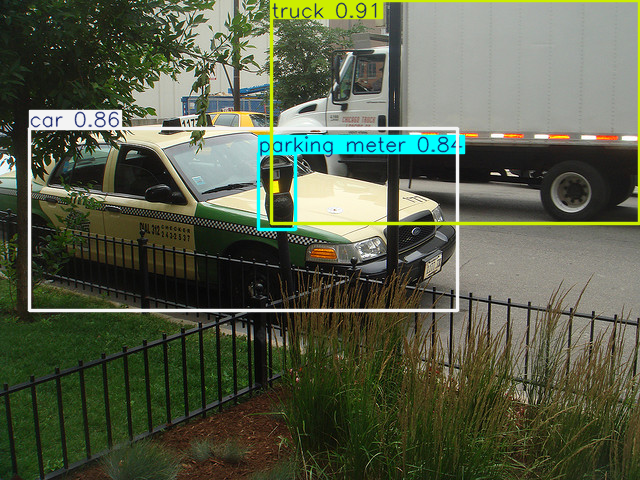

In [ ]:
# Process a single image from your Drive
results = model('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')

# Visualize results
for r in results:
    im = r.plot()

    # Display in notebook
    import cv2
    from google.colab.patches import cv2_imshow
    cv2_imshow(im)